In [1]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('files.csv', encoding="utf-8", delimiter=",")
df.head()

,file,versions,size,average
0,1,213,429296,2015.474178
1,31,92,7248253,78785.3587
2,62,66,11109745,168329.4697
3,63,66,8589855,130149.3182
4,72,63,408726,6487.714286


In [3]:
df['avg'] = df['size'] / df['versions']

In [4]:
df['avg'] = df['avg'] / 1024
df['size'] = df['size'] / 1024


In [5]:
df.describe()

,file,versions,size,avg
count,1412.000000,1412.000000,1412.000000,1412.000000
mean,4720.133853,25.107649,5666.684304,274.817444
std,2015.508465,12.792063,13506.552261,875.408946
min,1.000000,1.000000,0.000000,0.000000
25%,2584.000000,16.000000,368.418213,18.242753
50%,5448.500000,21.000000,909.638672,38.481935
75%,6428.250000,35.000000,4650.275391,157.873071
max,7287.000000,213.000000,100881.586914,10088.158691


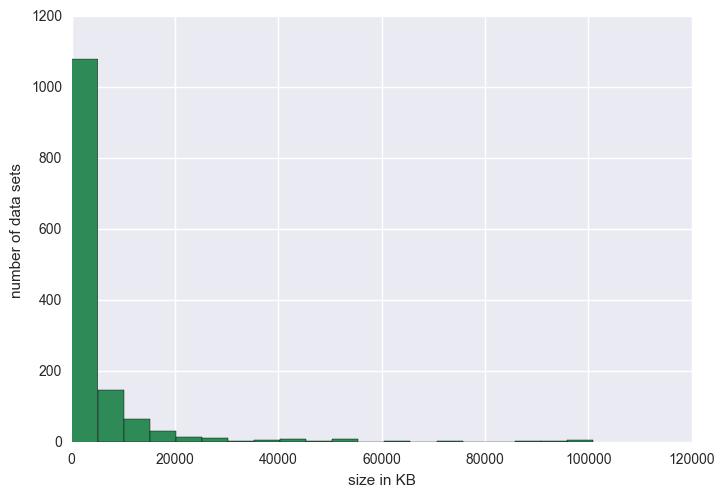

In [8]:
ax = df['size'].hist(color="seagreen", bins=20) 
ax.set(xlabel='size in KB', ylabel='number of data sets')

sns.plt.savefig("pictures/totalsize.png")
plt.show()

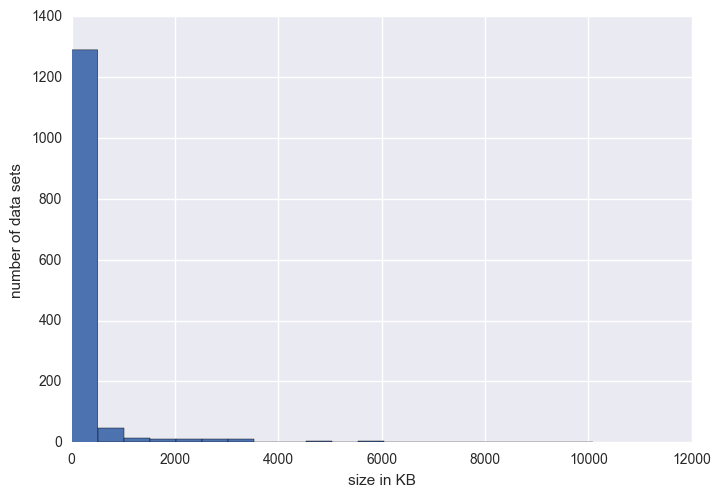

In [9]:
ax = df['avg'].hist(bins=20)
ax.set(xlabel='size in KB', ylabel='number of data sets')
sns.plt.savefig("pictures/averagesize.png")

plt.show()

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


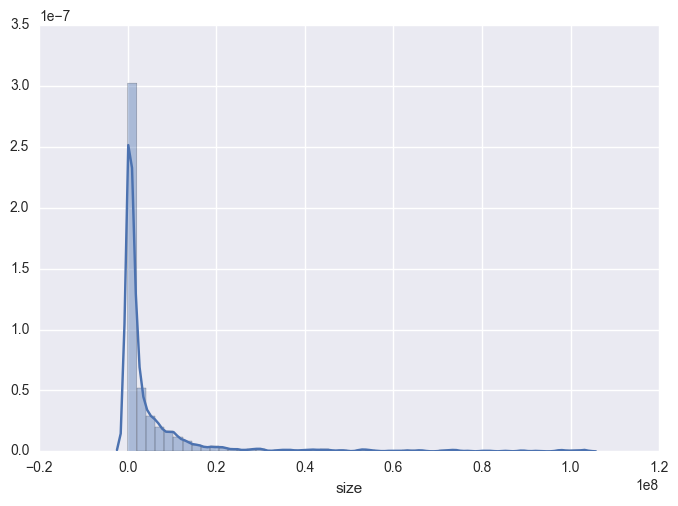

In [32]:
sns.distplot(df['size']);
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


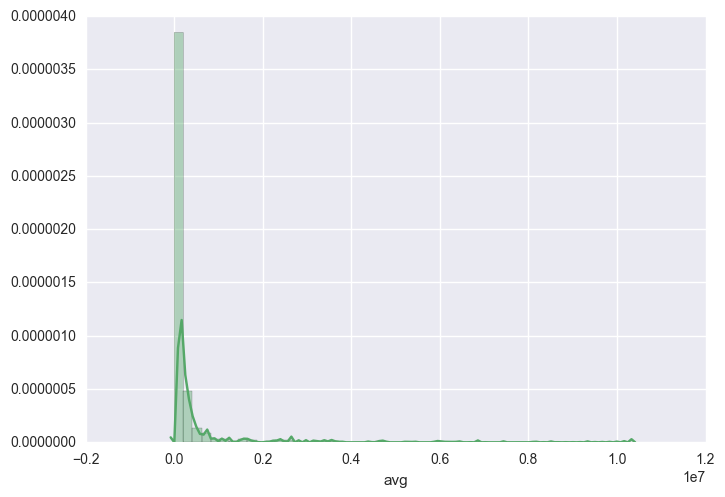

In [31]:
sns.distplot(df['avg']);
plt.show()

In [23]:
df.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,file,versions,size,average
count,1412.000000,1412.000000,1.412000e+03,1.411000e+03
mean,4720.133853,25.107649,5.802685e+06,2.049569e+12
std,2015.508465,12.792063,1.383071e+07,3.670481e+13
min,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,2584.000000,16.000000,3.772602e+05,NaN
50%,5448.500000,21.000000,9.314700e+05,NaN
75%,6428.250000,35.000000,4.761882e+06,NaN
max,7287.000000,213.000000,1.033027e+08,9.362630e+14


In [22]:
g = sns.pairplot(df)
sns.plt.show()

ValueError: max must be larger than min in range parameter.

In [21]:
df.corr()

,file,versions,size,average
file,1.000000,-0.823794,-0.158142,0.042160
versions,-0.823794,1.000000,0.069528,-0.055213
size,-0.158142,0.069528,1.000000,0.297084
average,0.042160,-0.055213,0.297084,1.000000
